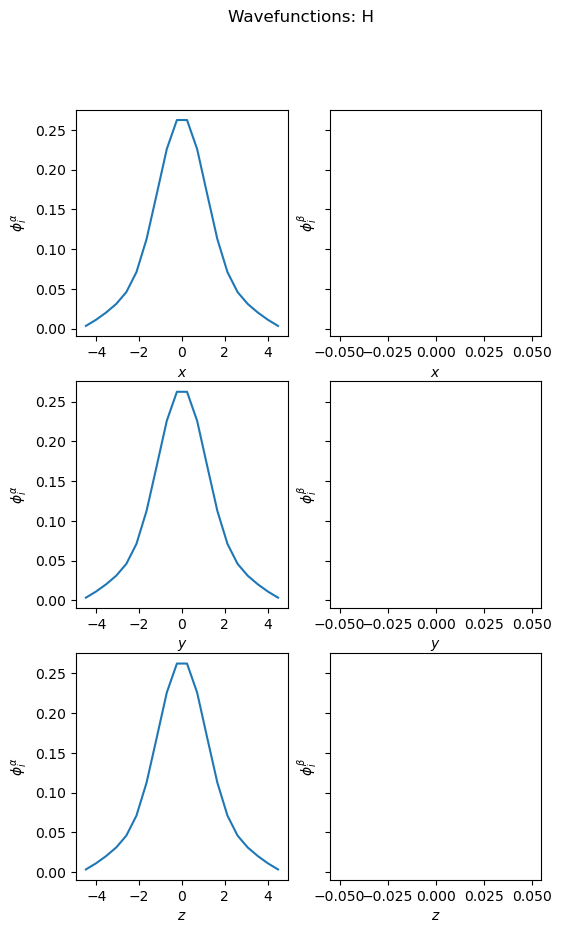

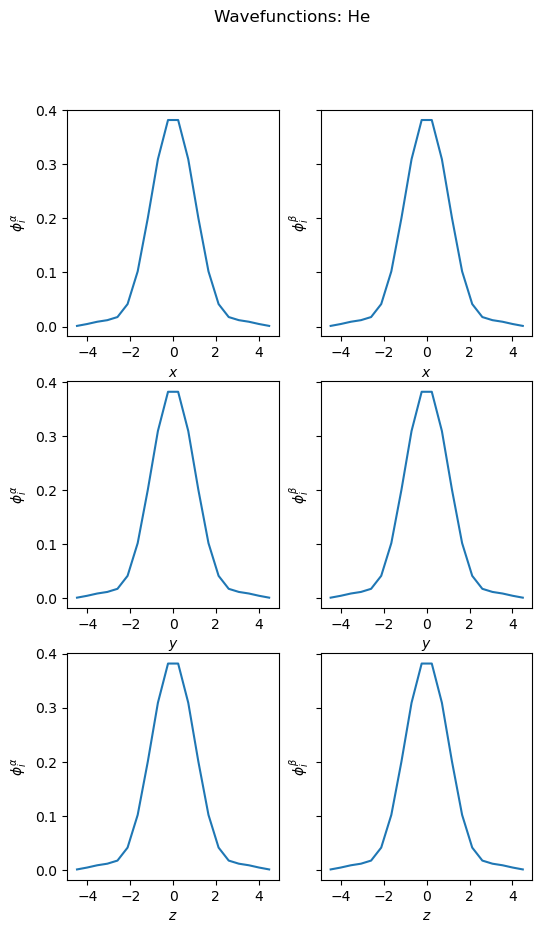

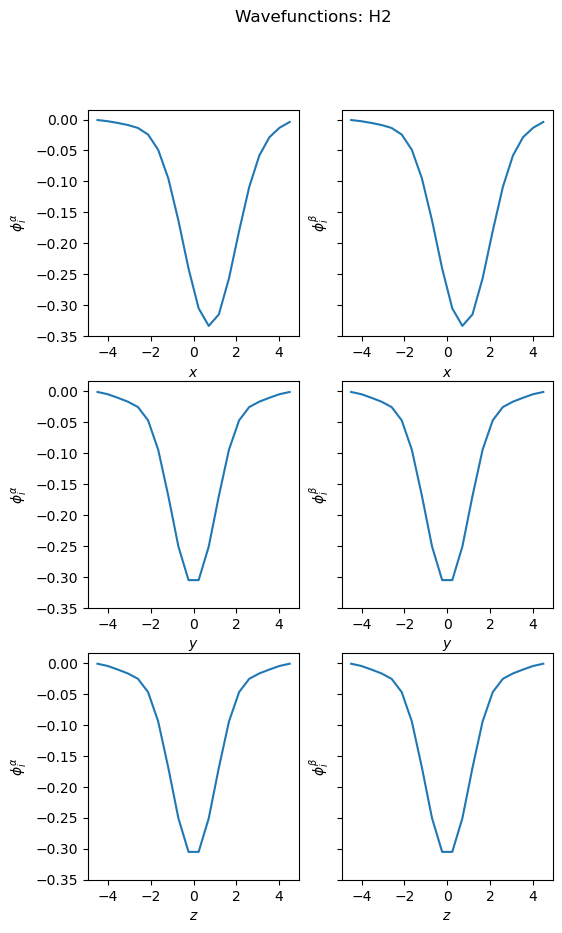

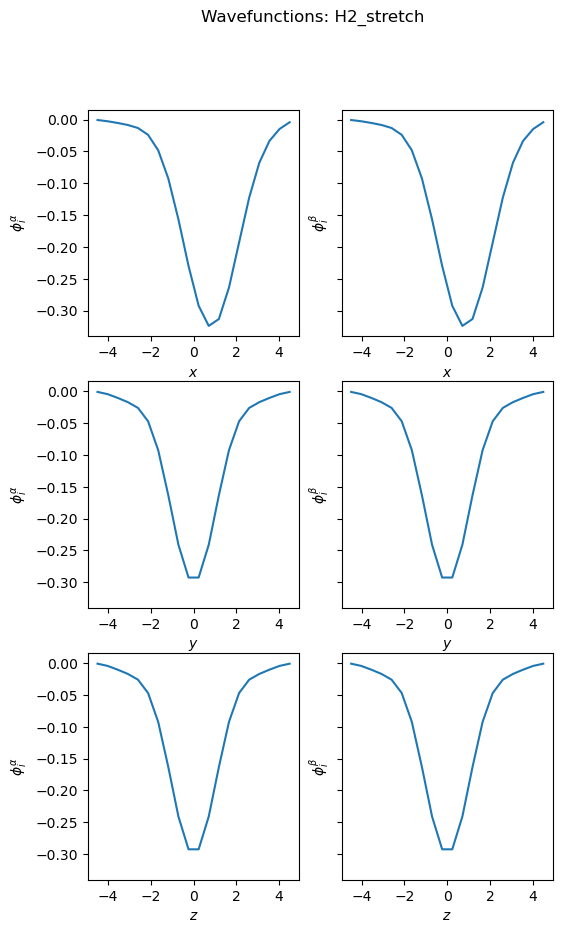

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

for molecule in ["H", "He", "H2", "H2_stretch"]:
    with h5py.File(f"student_output/hw6_1/{molecule}.hdf5", "r") as hf:
        C_alpha = np.array(hf["C_alpha"])
        C_beta = np.array(hf["C_beta"])
        grid = np.array(hf["grid_points"])
        grid_wavefunction = np.array(hf["grid_wavefunction"])
        density_alpha = np.array(hf["density_alpha"])
        density_beta = np.array(hf["density_beta"])
    fig, axs = plt.subplots(3, 2, figsize=(6, 10), sharey=True)
    for dir in range(3):
        center = np.min(np.abs(grid))
        mask = np.isclose(grid[:, np.mod(dir + 1, 3)], center) & np.isclose(grid[:, np.mod(dir + 2, 3)], center)
        # mask = np.full_like(mask, True)
        axs[dir, 0].plot(grid[mask, dir], (C_alpha @ grid_wavefunction)[:, mask].T)
        axs[dir, 1].plot(grid[mask, dir], (C_beta @ grid_wavefunction)[:, mask].T)
        axs[dir, 0].set_xlabel(["$x$", "$y$", "$z$"][dir])
        axs[dir, 1].set_xlabel(["$x$", "$y$", "$z$"][dir])
        axs[dir, 0].set_ylabel(r"$\phi_i^\alpha$")
        axs[dir, 1].set_ylabel(r"$\phi_i^\beta$")
    fig.suptitle(f"Wavefunctions: {molecule}")
    fig.savefig(f"student_output/hw6_1/{molecule}_wavefunctions.pdf", bbox_inches="tight")
    plt.show()
    # fig = plt.figure()
    # ax = fig.add_subplot(projection='3d')
    # max_density = max(density_alpha.max(), density_beta.max())
    # ax.scatter(*grid.T, lw=0, color="blue", alpha=density_alpha[0]*0.5/max_density, label=r"$\rho^\alpha$")
    # ax.scatter(*grid.T, lw=0, color="red", alpha=density_beta[0]*0.5/max_density, label=r"$\rho^\beta$")
    # ax.set_xlabel("$x$")
    # ax.set_ylabel("$y$")
    # ax.set_zlabel("$z$")
    # fig.suptitle(f"Density: {molecule}")
    # fig.savefig(f"student_output/hw6_1/{molecule}_density.pdf", bbox_inches="tight")
    plt.show()